@author: Octavio Gutiérrez de Código Máquina 

URL del canal: https://www.youtube.com/CodigoMaquina 

URL del video: https://youtu.be/BiRDgr-1eII  

<h1 style="color:purple">Suavización Exponencial Simple</h1> 
<h3 style="color:deeppink">Ejemplo con optimización automática</h3> 

Factor de suavización (alfa) = 0.04762756535596715
Nivel inicial (l_0) =  38.79624849057231
Pronóstico (y_{T+h|T}) =  43.78508893573853


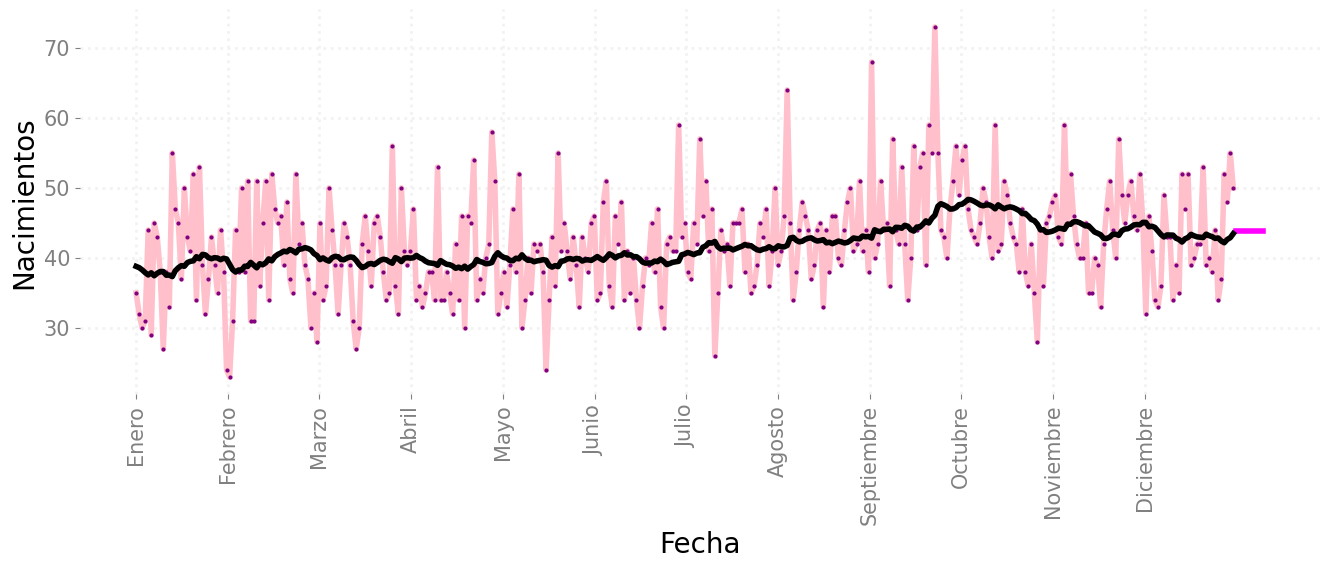

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.api import SimpleExpSmoothing

# Personalización de parámetros para la gráfica
plt.rcParams["figure.figsize"] = [16, 5]
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["lines.markerfacecolor"] = "purple"
plt.rcParams["lines.markeredgecolor"] = "purple"
plt.rcParams["lines.markersize"] = 2
plt.rcParams["patch.facecolor"] = "purple"
plt.rcParams["patch.edgecolor"] = "purple"
plt.rcParams["xtick.color"] = "gray"
plt.rcParams["ytick.color"] = "gray"

# Ignorar warnings
warnings.filterwarnings("ignore")

# Horizonte del pronóstico
horizonte = 10

datos = pd.read_csv("serie_de_tiempo_nacimientos.csv")
datos = datos.set_index(["fecha"])

# Rango del eje de las x para graficar los pronósticos en función del horizonte
rango_pronostico = np.arange(datos.index.size, datos.index.size + horizonte)

# Gráfica de la serie de tiempo 
fig, ax = plt.subplots()
ax.plot(datos.index, datos["nacimientos"], color="pink", marker="o")

ses = SimpleExpSmoothing(datos["nacimientos"])
model = ses.fit()
forecast = model.forecast(horizonte)

print("Factor de suavización (alfa) =", model.params["smoothing_level"])
print("Nivel inicial (l_0) = ", model.params["initial_level"])
print("Pronóstico (y_{T+h|T}) = ", model.forecast(horizonte)[0])

# Gráfica del pronóstico
ax.plot(rango_pronostico, forecast, color="magenta")

# Gráfica del suavizamiento
ax.plot(datos.index, model.fittedvalues, color="black")

# Más personalización de la gráfica
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
ax.set_ylabel("Nacimientos")
ax.set_xlabel("Fecha")
ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", 
                    "Junio", "Julio", "Agosto", "Septiembre",
                    "Octubre", "Noviembre", "Diciembre"])
ax.xaxis.set_ticks(np.arange(0, 
                             datos["nacimientos"].size, 
                             datos["nacimientos"].size/12))
plt.grid(color="#F3F2F2", linestyle=":", linewidth=2)
plt.show()


<h3 style="color:purple">Ejemplo con factor de suavizamiento (alfa) = 0.99</h3> 

Factor de suavización (alfa) = 0.99
Nivel inicial (l_0) =  35.0
Pronóstico (y_{T+h|T}) =  50.04930384970994


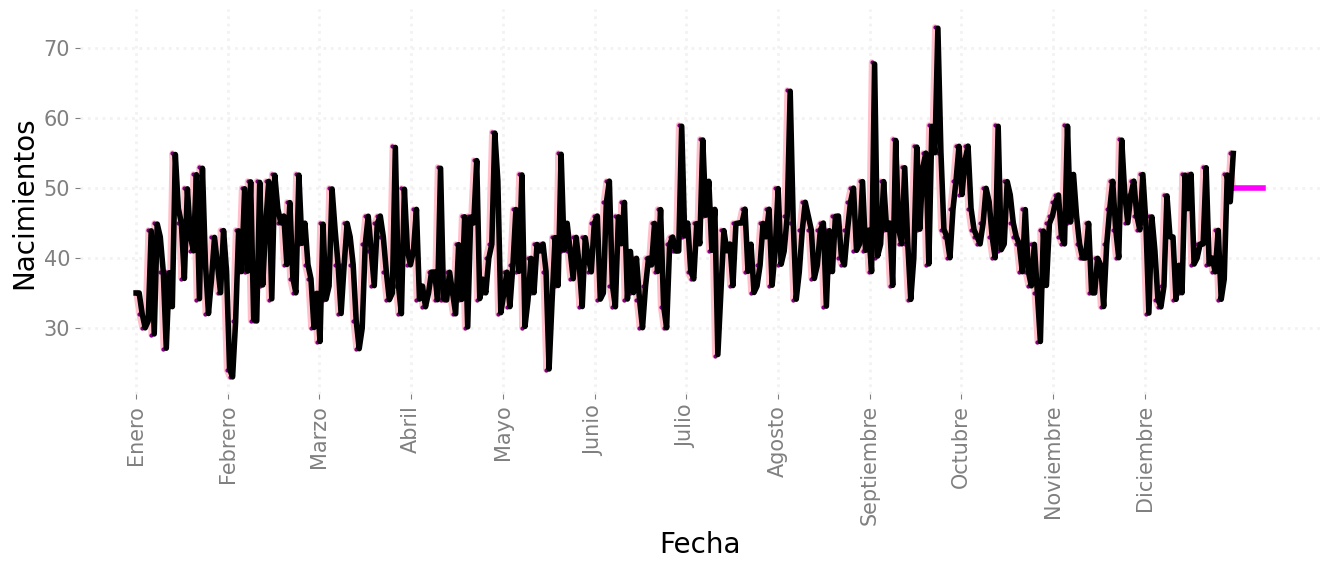

In [2]:
# Gráfica de la serie de tiempo 
fig, ax = plt.subplots()
ax.plot(datos.index, datos["nacimientos"], color="pink", marker="o")

alpha = 0.99
ses = SimpleExpSmoothing(datos["nacimientos"] )
model = ses.fit(smoothing_level = alpha, optimized = False)
forecast = model.forecast(horizonte)

print("Factor de suavización (alfa) =", model.params["smoothing_level"])
print("Nivel inicial (l_0) = ", model.params["initial_level"])
print("Pronóstico (y_{T+h|T}) = ", model.forecast(horizonte)[0])

# Gráfica del pronóstico
ax.plot(rango_pronostico, forecast, color="magenta")

# Gráfica del suavizamiento
ax.plot(datos.index, model.fittedvalues, color="black")

# Más personalización de la gráfica
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
ax.set_ylabel("Nacimientos")
ax.set_xlabel("Fecha")
ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", 
                    "Junio", "Julio", "Agosto", "Septiembre",
                    "Octubre", "Noviembre", "Diciembre"])
ax.xaxis.set_ticks(np.arange(0, 
                             datos["nacimientos"].size, 
                             datos["nacimientos"].size/12))
plt.grid(color="#F3F2F2", linestyle=":", linewidth=2)
plt.show()

<h3 style="color:purple">Ejemplo con factor de suavizamiento (alfa) = 0.01</h3> 

Factor de suavización (alfa) = 0.01
Nivel inicial (l_0) =  35.0
Pronóstico (y_{T+h|T}) =  43.32103678202763


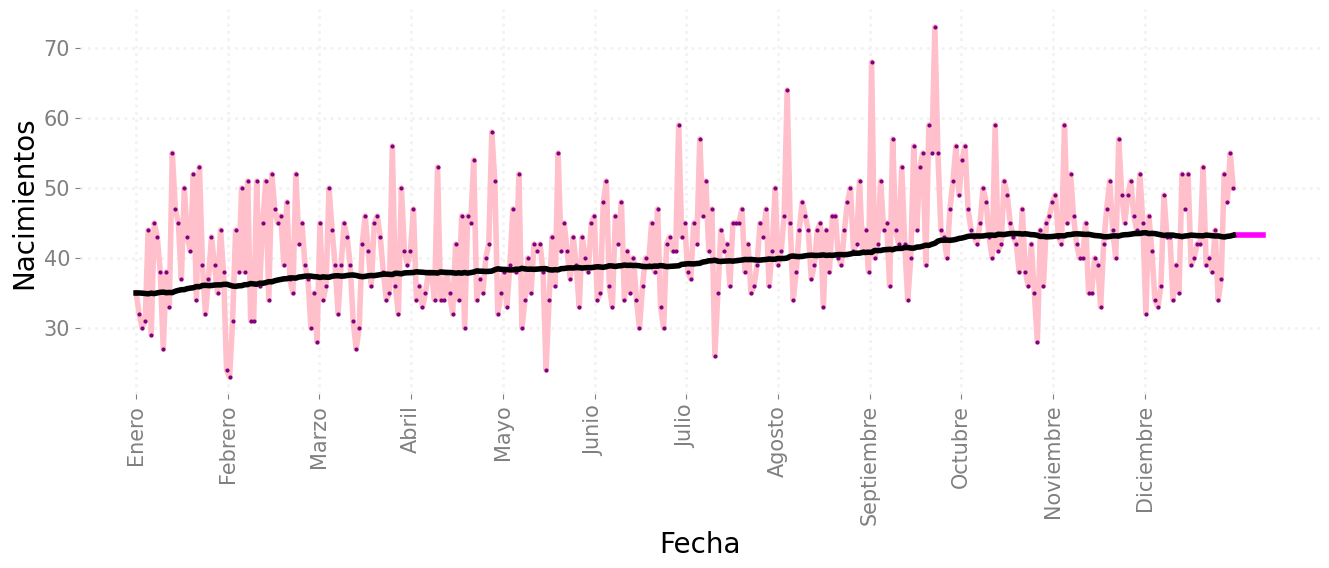

In [3]:
# Gráfica de la serie de tiempo 
fig, ax = plt.subplots()
ax.plot(datos.index, datos["nacimientos"], color="pink", marker="o")

alpha = 0.01

ses = SimpleExpSmoothing(datos["nacimientos"] )
model = ses.fit(smoothing_level = alpha, optimized = False)
forecast = model.forecast(horizonte)

print("Factor de suavización (alfa) =", model.params["smoothing_level"])
print("Nivel inicial (l_0) = ", model.params["initial_level"])
print("Pronóstico (y_{T+h|T}) = ", model.forecast(horizonte)[0])

# Gráfica del pronóstico
ax.plot(rango_pronostico, forecast, color="magenta")

# Gráfica del suavizamiento
ax.plot(datos.index, model.fittedvalues, color="black")

# Más personalización de la gráfica
ax = plt.gca()
ax.tick_params(axis="x", labelrotation = 90)
ax.set_ylabel("Nacimientos")
ax.set_xlabel("Fecha")
ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", 
                    "Junio", "Julio", "Agosto", "Septiembre",
                    "Octubre", "Noviembre", "Diciembre"])
ax.xaxis.set_ticks(np.arange(0, 
                             datos["nacimientos"].size, 
                             datos["nacimientos"].size/12))
plt.grid(color="#F3F2F2", linestyle=":", linewidth=2)
plt.show()